In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
url = 'https://raw.githubusercontent.com/klaytoncastro/idp-machinelearning/refs/heads/main/clustering/mall_customers.csv'
df = pd.read_csv(url)
print("\nPrimeiras linhas do dataset:")
print(df.head())


Primeiras linhas do dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Análise univariada
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

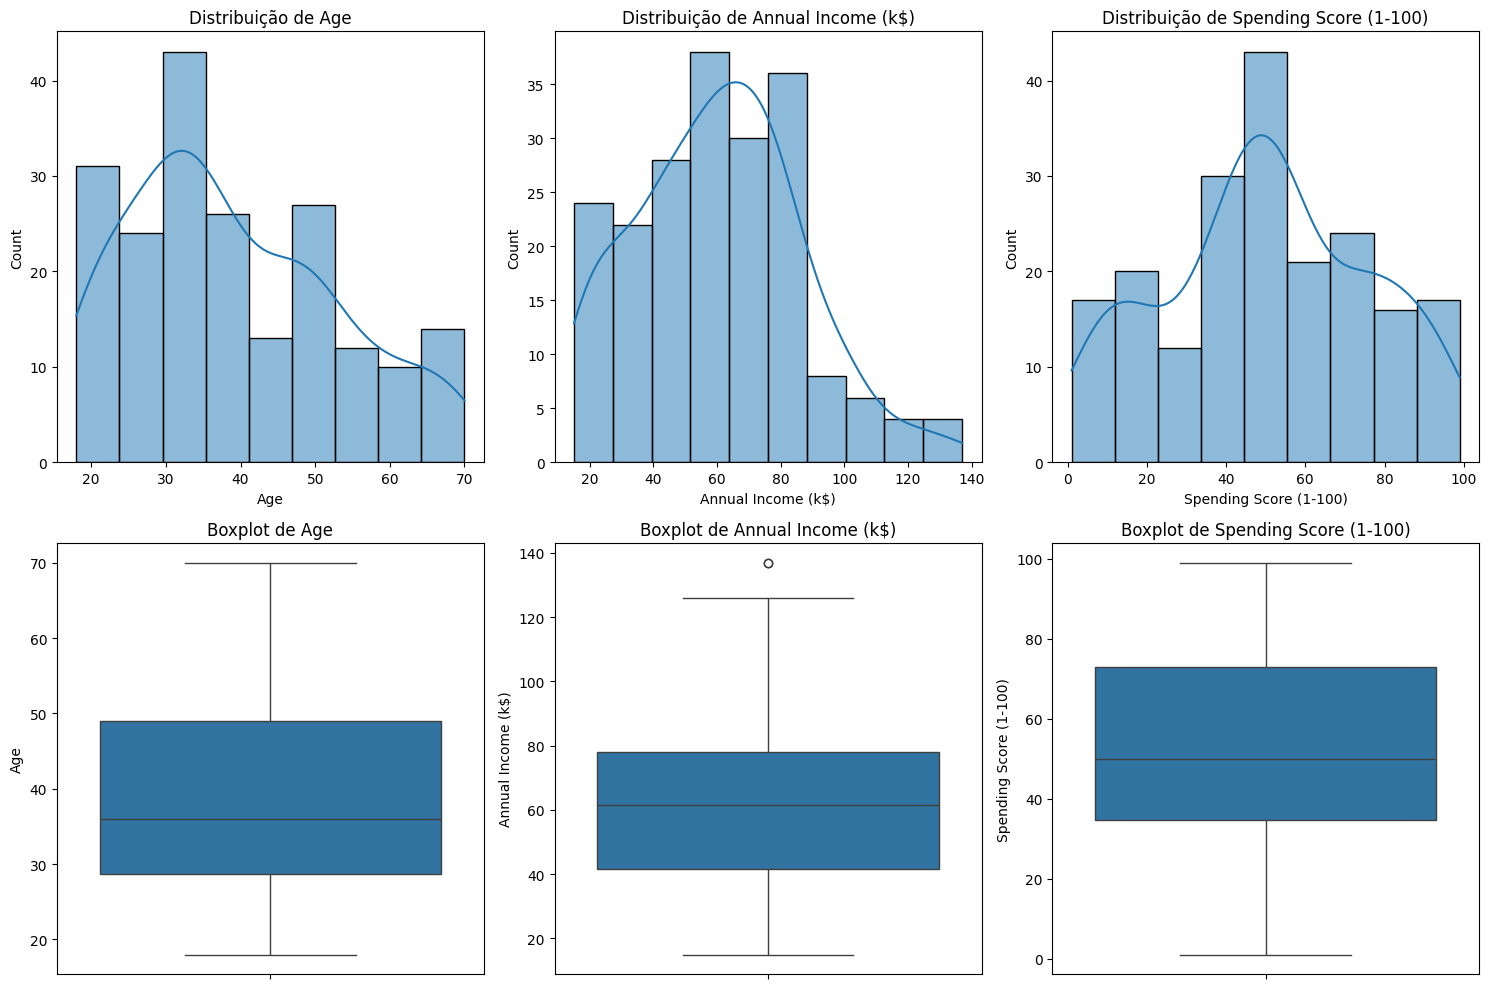

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'Distribuição de {col}')
    sns.boxplot(data=df, y=col, ax=axes[1, i])
    axes[1, i].set_title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

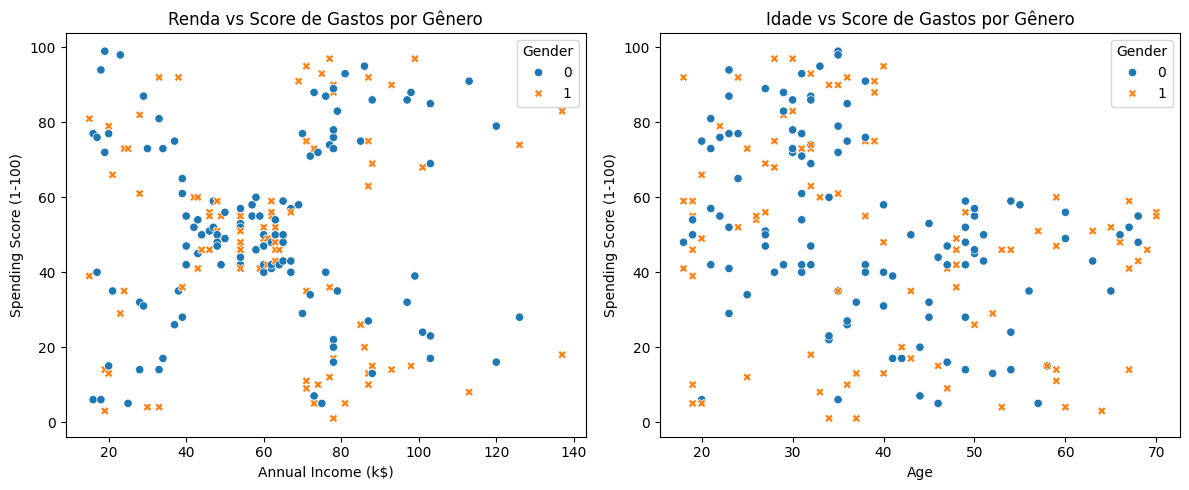

In [5]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', style='Gender')
plt.title('Renda vs Score de Gastos por Gênero')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender', style='Gender')
plt.title('Idade vs Score de Gastos por Gênero')
plt.tight_layout()
plt.show()

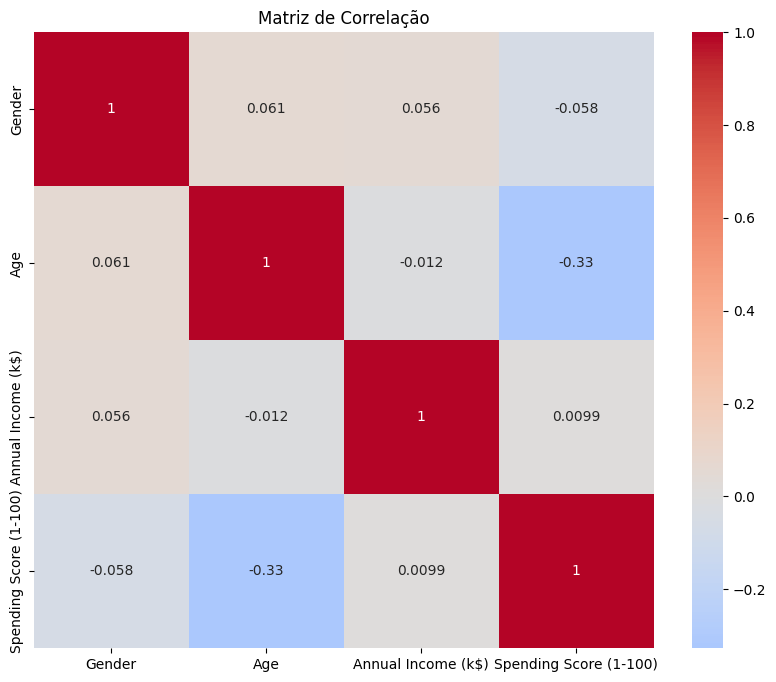

In [6]:
plt.figure(figsize=(10, 8))
corr_matrix = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

In [8]:
feature_sets = {
    'income_spending': ['Annual Income (k$)', 'Spending Score (1-100)'],
    'all_features': ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
}

scaler = StandardScaler()
scaled_data = {}
for name, features in feature_sets.items():
    X = df[features].values
    X_scaled = scaler.fit_transform(X)
    scaled_data[name] = X_scaled


In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage


Análise para income_spending:


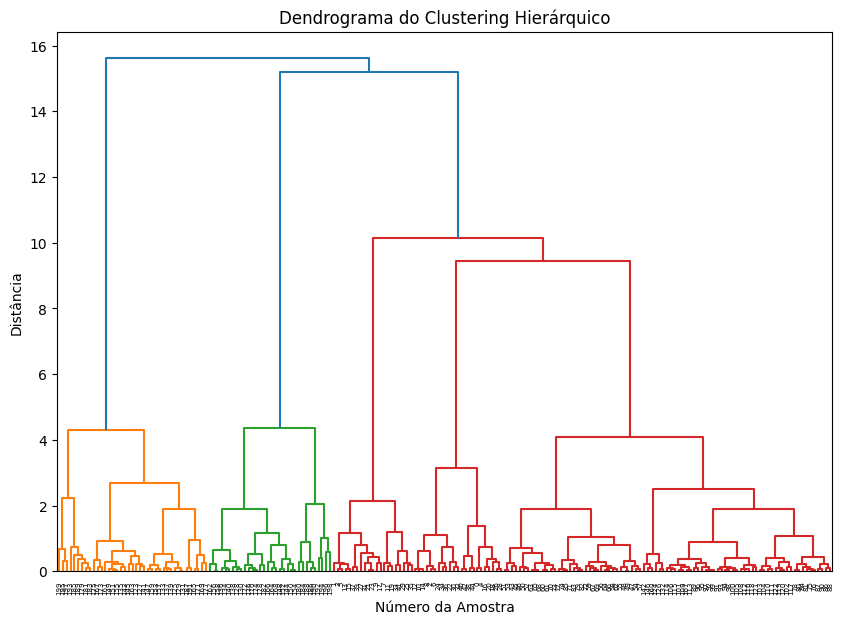

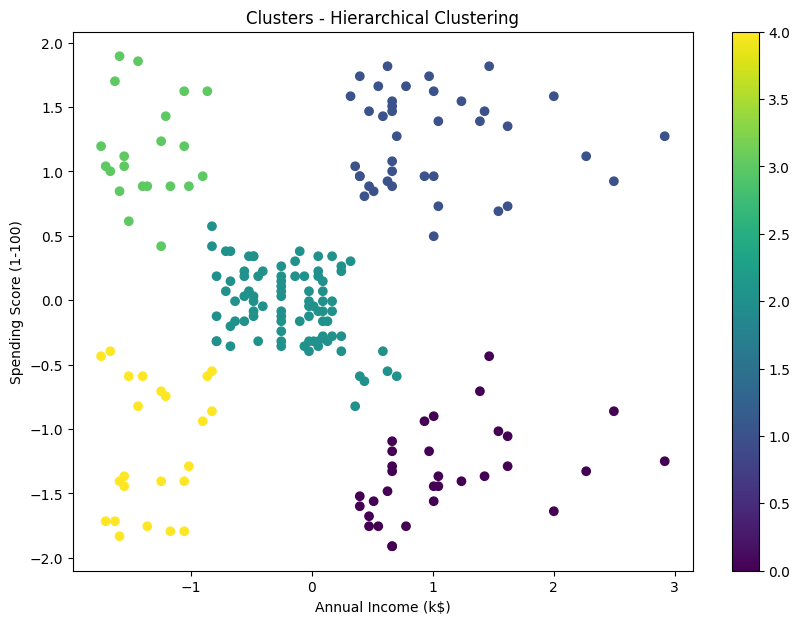


Análise para all_features:


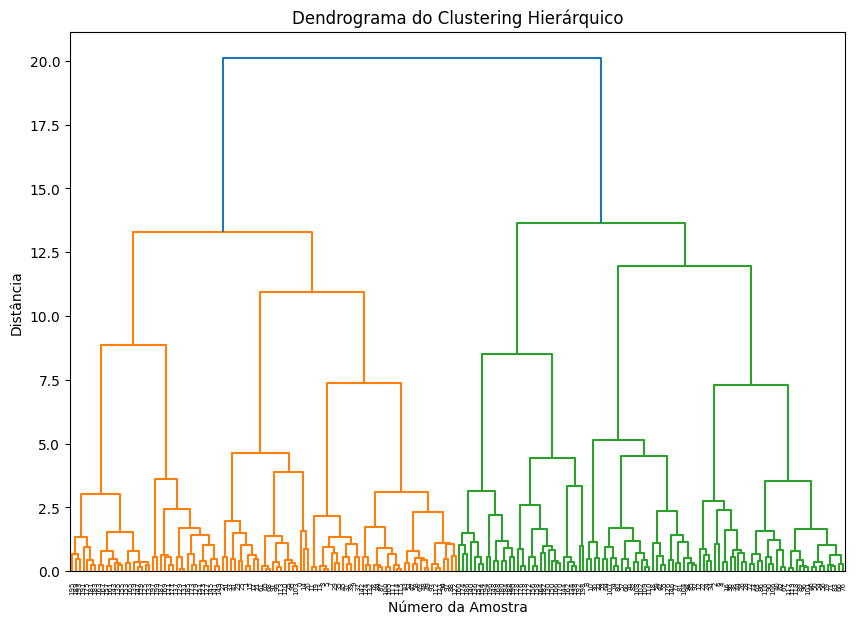

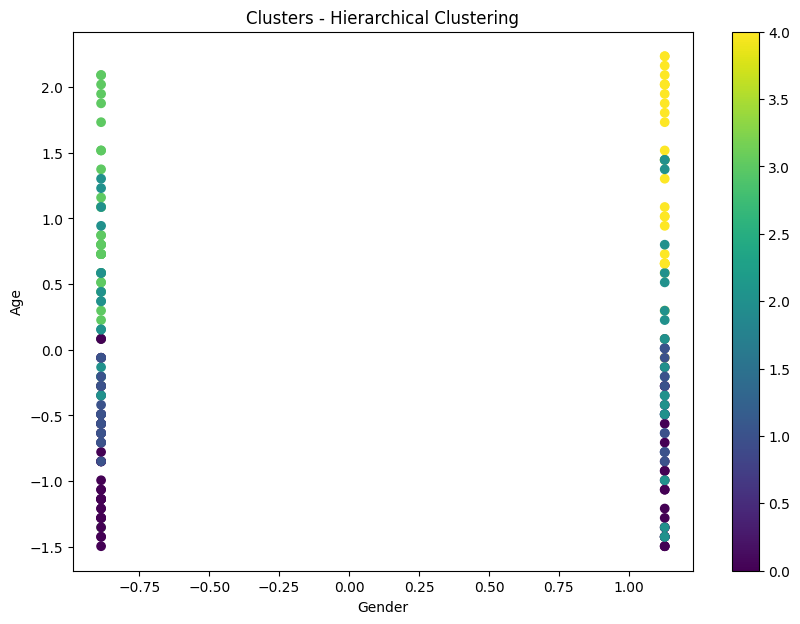

In [17]:
for name, X in scaled_data.items():
    print(f"\nAnálise para {name}:")
    features = feature_sets[name]

    # Clustering Hierárquico
    linkage_matrix = linkage(X, method='ward')
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix)
    plt.title('Dendrograma do Clustering Hierárquico')
    plt.xlabel('Número da Amostra')
    plt.ylabel('Distância')
    plt.show()

    hc = AgglomerativeClustering(n_clusters=5)
    hier_labels = hc.fit_predict(X)

    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=hier_labels, cmap='viridis')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title('Clusters - Hierarchical Clustering')
    plt.colorbar(scatter)
    plt.show()


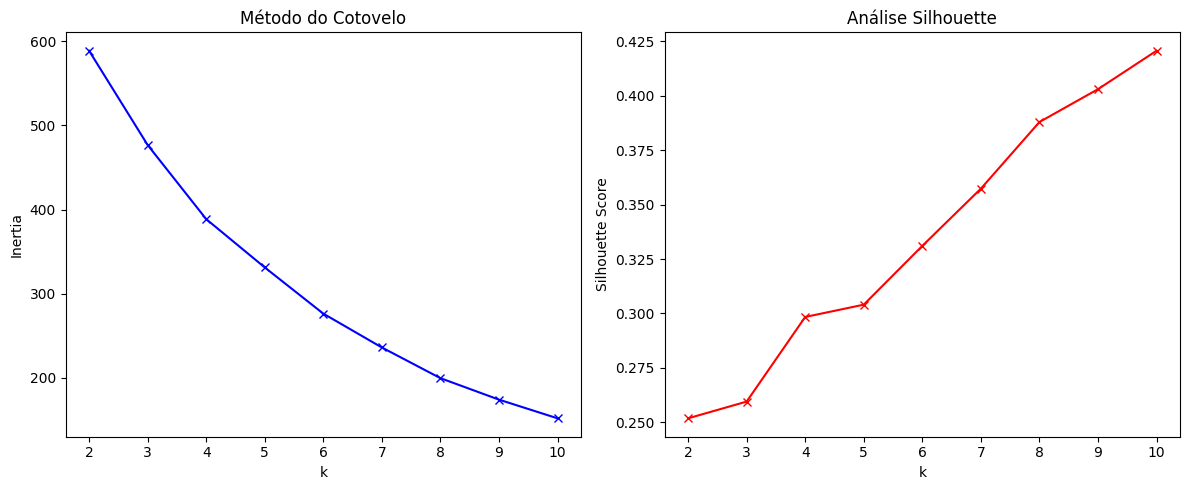

Número ótimo de clusters: 10


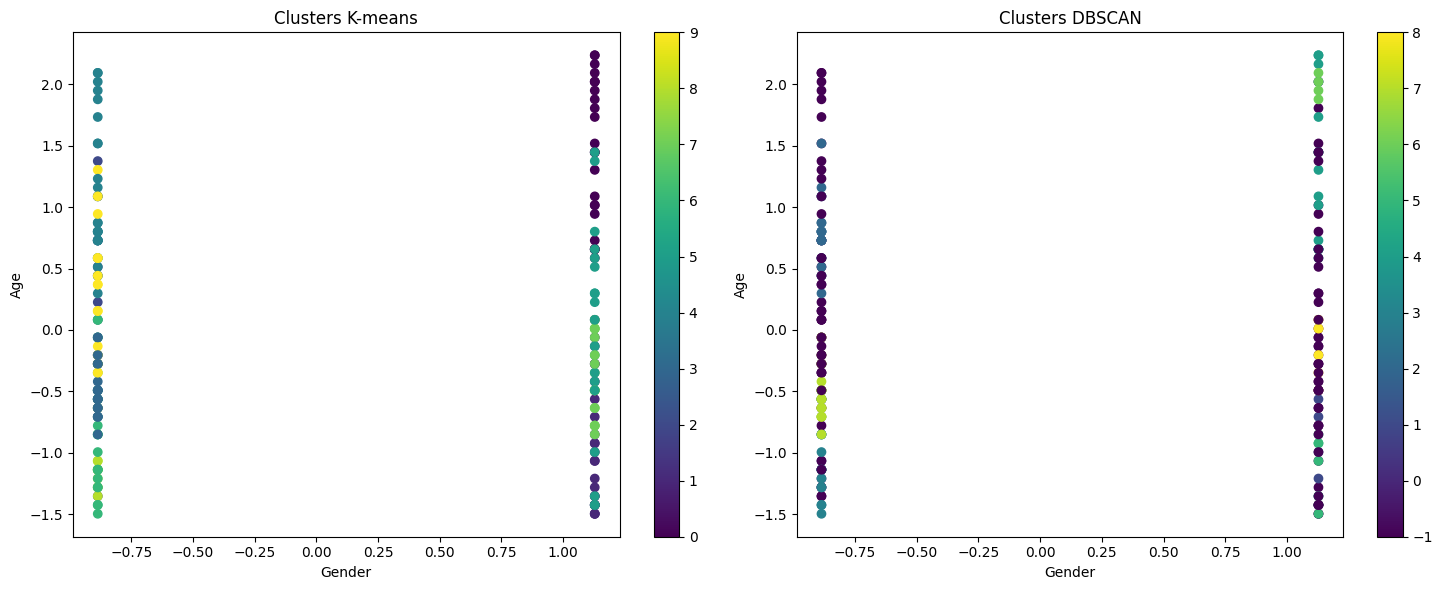

In [18]:
# 4. Otimização do número de clusters para K-means
max_clusters = 10
inertias = []
silhouette_scores = []

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Método do Cotovelo')

plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Análise Silhouette')

plt.tight_layout()
plt.show()

optimal_k = np.argmax(silhouette_scores) + 2
print(f"Número ótimo de clusters: {optimal_k}")

# Aplicação dos algoritmos de clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
scatter1 = axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
axes[0].set_xlabel(features[0])
axes[0].set_ylabel(features[1])
axes[0].set_title('Clusters K-means')
plt.colorbar(scatter1, ax=axes[0])

scatter2 = axes[1].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
axes[1].set_xlabel(features[0])
axes[1].set_ylabel(features[1])
axes[1].set_title('Clusters DBSCAN')
plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.show()


Cluster 0:
       Gender        Age  Annual Income (k$)  Spending Score (1-100)
count    26.0  26.000000           26.000000               26.000000
mean      1.0  58.846154           48.692308               39.846154
std       0.0   8.048316           14.529334               17.721608
min       1.0  47.000000           19.000000                3.000000
25%       1.0  52.250000           43.000000               37.250000
50%       1.0  59.000000           51.500000               46.000000
75%       1.0  66.750000           61.750000               51.000000
max       1.0  70.000000           71.000000               60.000000


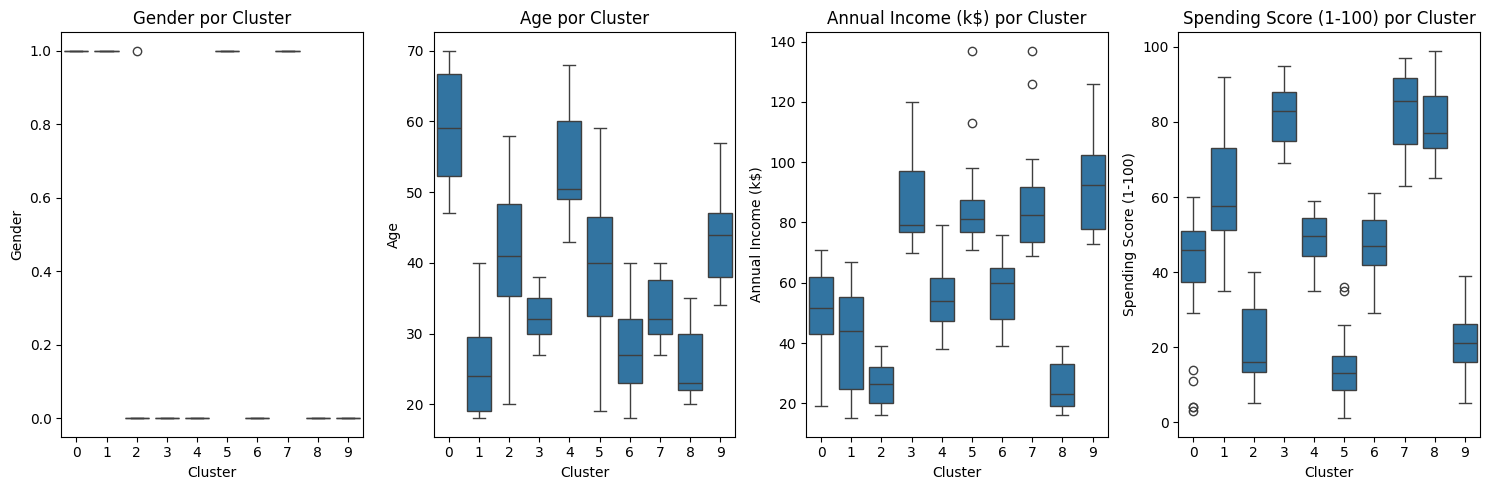


Cluster 1:
       Gender        Age  Annual Income (k$)  Spending Score (1-100)
count    24.0  24.000000           24.000000               24.000000
mean      1.0  25.250000           41.250000               60.916667
std       0.0   6.860409           17.192643               15.838634
min       1.0  18.000000           15.000000               35.000000
25%       1.0  19.000000           24.750000               51.250000
50%       1.0  24.000000           44.000000               57.500000
75%       1.0  29.500000           55.250000               73.000000
max       1.0  40.000000           67.000000               92.000000


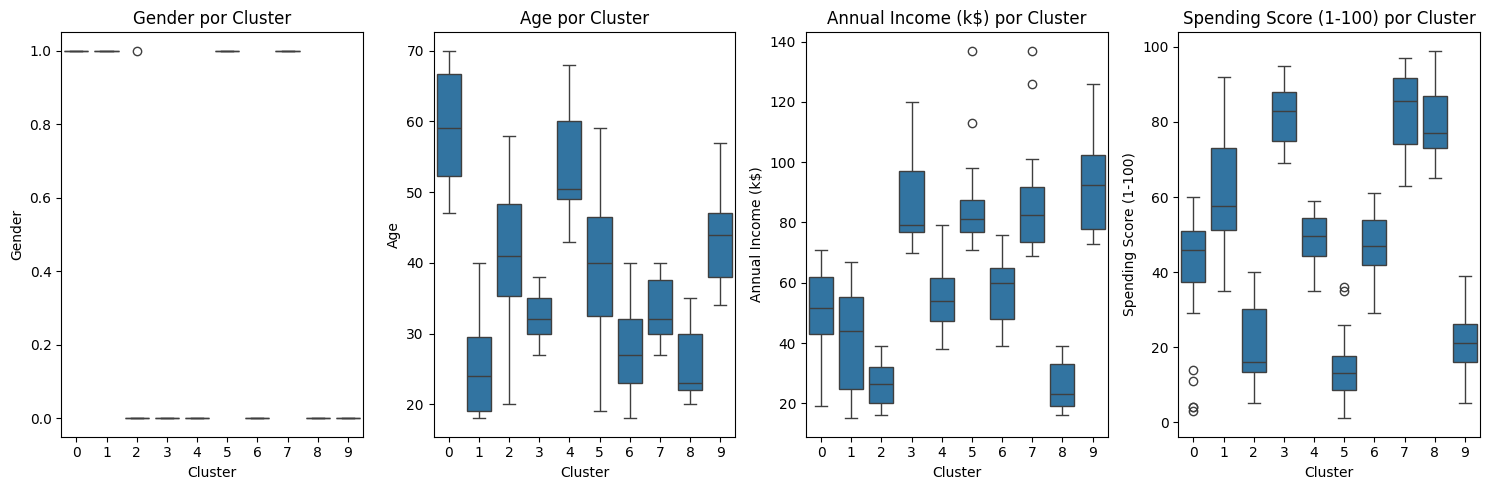


Cluster 2:
          Gender        Age  Annual Income (k$)  Spending Score (1-100)
count  14.000000  14.000000           14.000000               14.000000
mean    0.071429  41.214286           26.071429               20.142857
std     0.267261   9.931911            7.660732               11.641155
min     0.000000  20.000000           16.000000                5.000000
25%     0.000000  35.250000           20.000000               13.250000
50%     0.000000  41.000000           26.500000               16.000000
75%     0.000000  48.250000           32.000000               30.250000
max     1.000000  58.000000           39.000000               40.000000


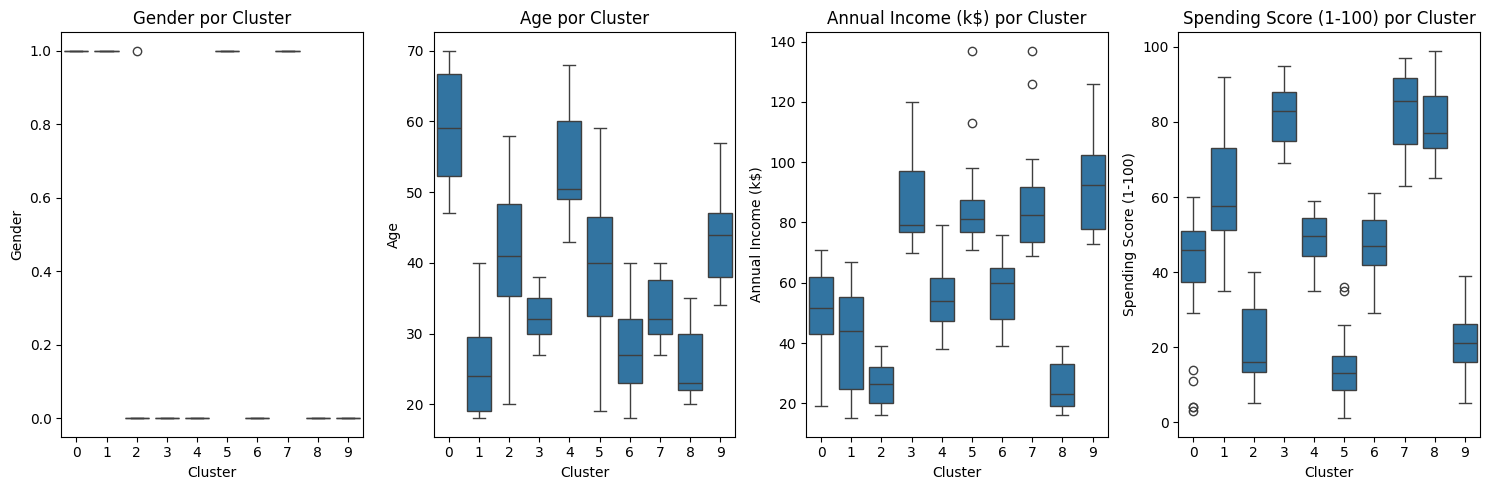


Cluster 3:
       Gender        Age  Annual Income (k$)  Spending Score (1-100)
count    21.0  21.000000           21.000000               21.000000
mean      0.0  32.190476           86.047619               81.666667
std       0.0   3.076021           14.157953                7.831560
min       0.0  27.000000           70.000000               69.000000
25%       0.0  30.000000           77.000000               75.000000
50%       0.0  32.000000           79.000000               83.000000
75%       0.0  35.000000           97.000000               88.000000
max       0.0  38.000000          120.000000               95.000000


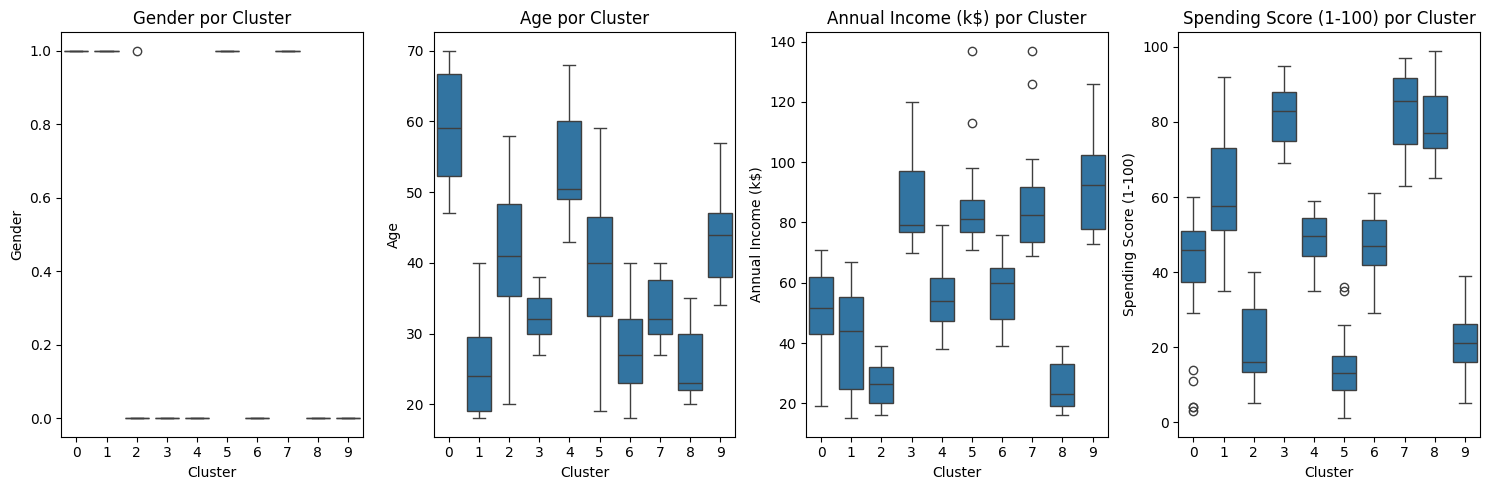


Cluster 4:
       Gender        Age  Annual Income (k$)  Spending Score (1-100)
count    26.0  26.000000           26.000000               26.000000
mean      0.0  54.153846           54.230769               48.961538
std       0.0   7.821469            9.957139                6.696153
min       0.0  43.000000           38.000000               35.000000
25%       0.0  49.000000           47.250000               44.250000
50%       0.0  50.500000           54.000000               49.500000
75%       0.0  60.000000           61.500000               54.500000
max       0.0  68.000000           79.000000               59.000000


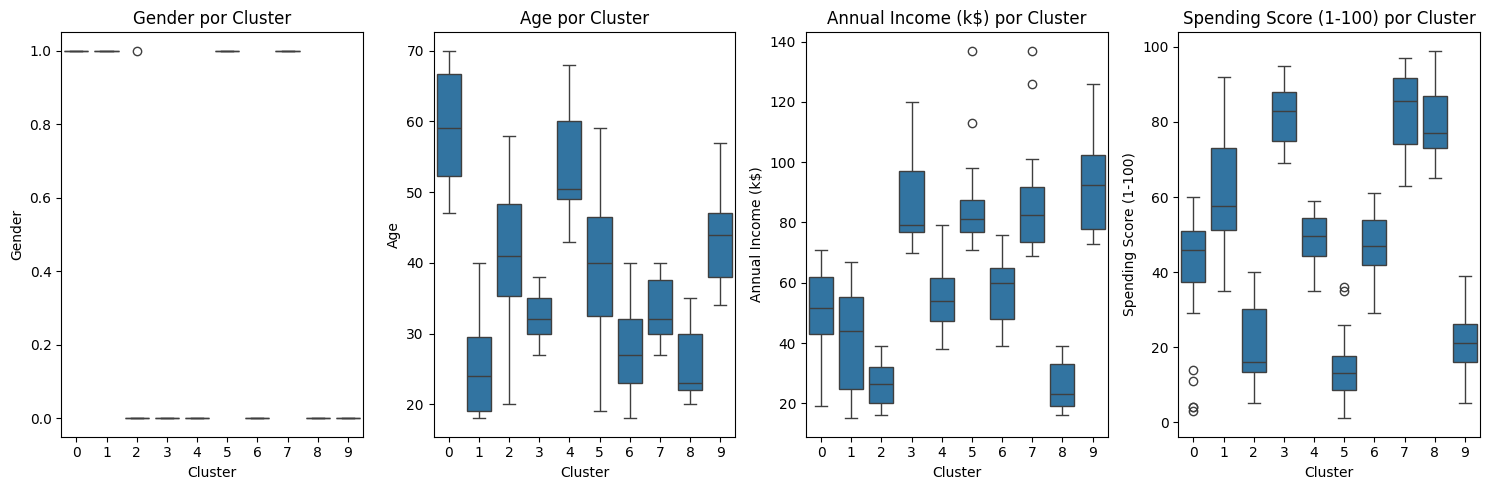


Cluster 5:
       Gender        Age  Annual Income (k$)  Spending Score (1-100)
count    19.0  19.000000           19.000000               19.000000
mean      1.0  38.473684           85.894737               14.210526
std       0.0  12.001706           16.110365                9.801241
min       1.0  19.000000           71.000000                1.000000
25%       1.0  32.500000           77.000000                8.500000
50%       1.0  40.000000           81.000000               13.000000
75%       1.0  46.500000           87.500000               17.500000
max       1.0  59.000000          137.000000               36.000000


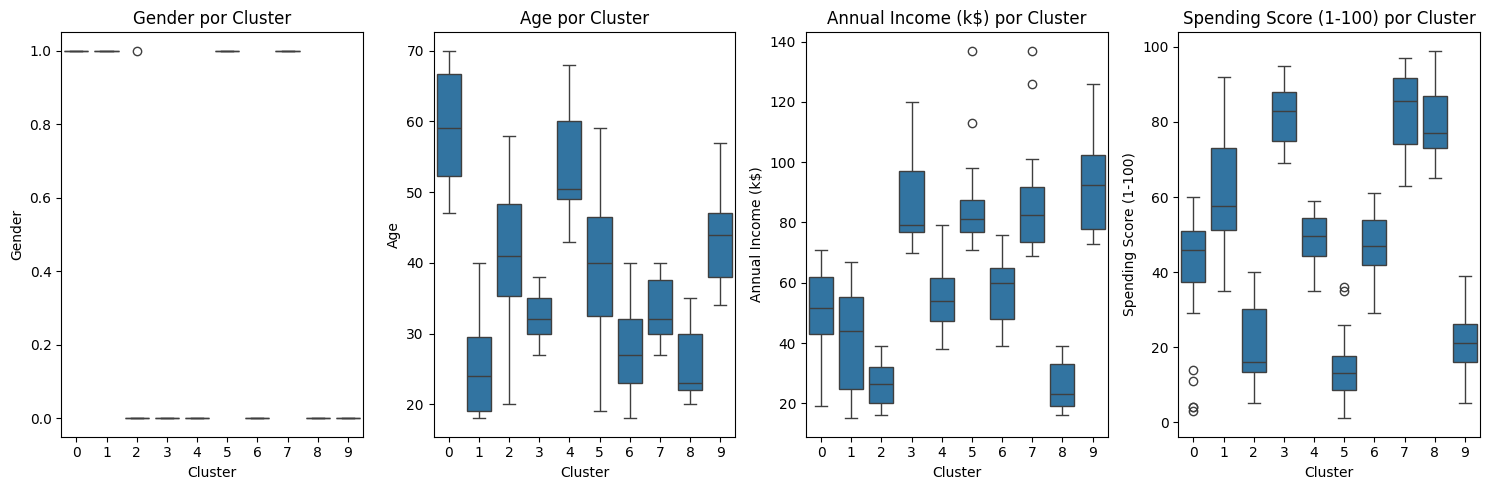


Cluster 6:
       Gender        Age  Annual Income (k$)  Spending Score (1-100)
count    25.0  25.000000           25.000000               25.000000
mean      0.0  27.960000           57.360000               47.120000
std       0.0   6.667583           10.980589                8.186982
min       0.0  18.000000           39.000000               29.000000
25%       0.0  23.000000           48.000000               42.000000
50%       0.0  27.000000           60.000000               47.000000
75%       0.0  32.000000           65.000000               54.000000
max       0.0  40.000000           76.000000               61.000000


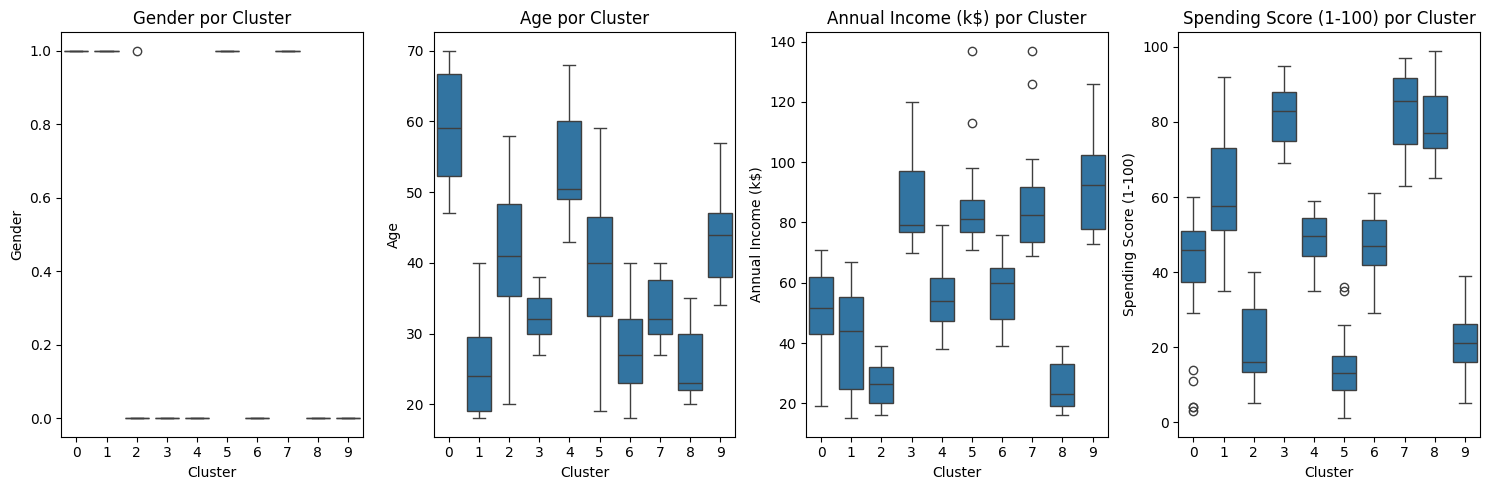


Cluster 7:
       Gender        Age  Annual Income (k$)  Spending Score (1-100)
count    18.0  18.000000           18.000000               18.000000
mean      1.0  33.277778           87.111111               82.666667
std       0.0   4.389902           18.929867               11.103788
min       1.0  27.000000           69.000000               63.000000
25%       1.0  30.000000           73.500000               74.250000
50%       1.0  32.000000           82.500000               85.500000
75%       1.0  37.500000           91.750000               91.750000
max       1.0  40.000000          137.000000               97.000000


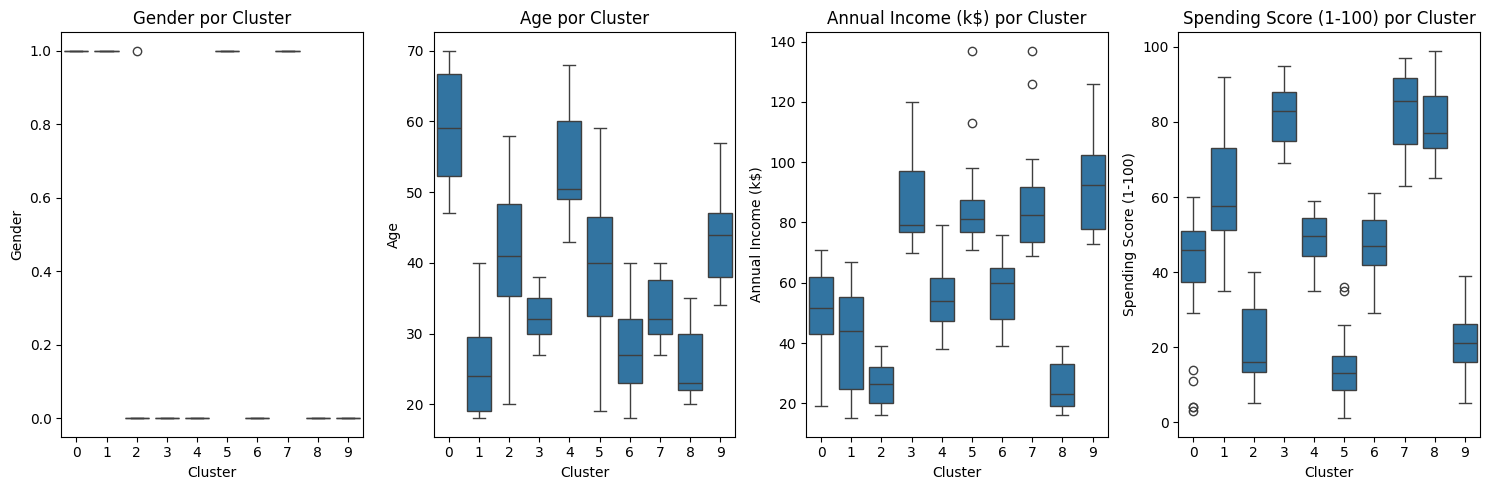


Cluster 8:
       Gender        Age  Annual Income (k$)  Spending Score (1-100)
count    13.0  13.000000           13.000000               13.000000
mean      0.0  25.461538           25.692308               80.538462
std       0.0   5.221995            8.239990               10.697472
min       0.0  20.000000           16.000000               65.000000
25%       0.0  22.000000           19.000000               73.000000
50%       0.0  23.000000           23.000000               77.000000
75%       0.0  30.000000           33.000000               87.000000
max       0.0  35.000000           39.000000               99.000000


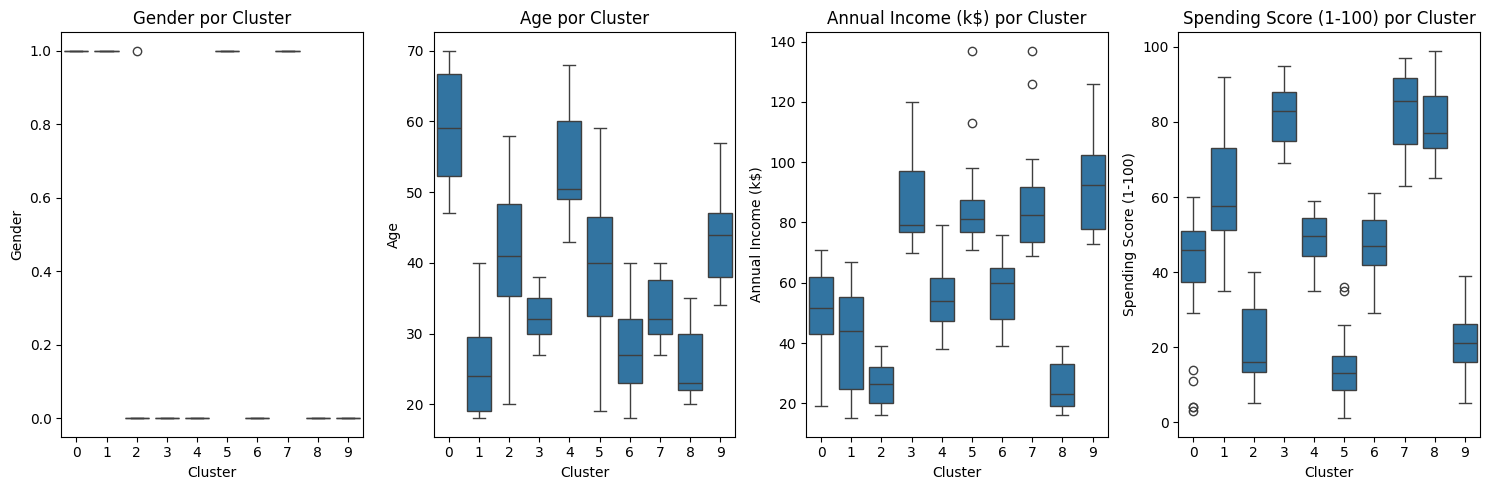


Cluster 9:
       Gender        Age  Annual Income (k$)  Spending Score (1-100)
count    14.0  14.000000           14.000000               14.000000
mean      0.0  43.785714           93.285714               20.642857
std       0.0   7.244930           16.624489                9.303491
min       0.0  34.000000           73.000000                5.000000
25%       0.0  38.000000           78.000000               16.000000
50%       0.0  44.000000           92.500000               21.000000
75%       0.0  47.000000          102.500000               26.250000
max       0.0  57.000000          126.000000               39.000000


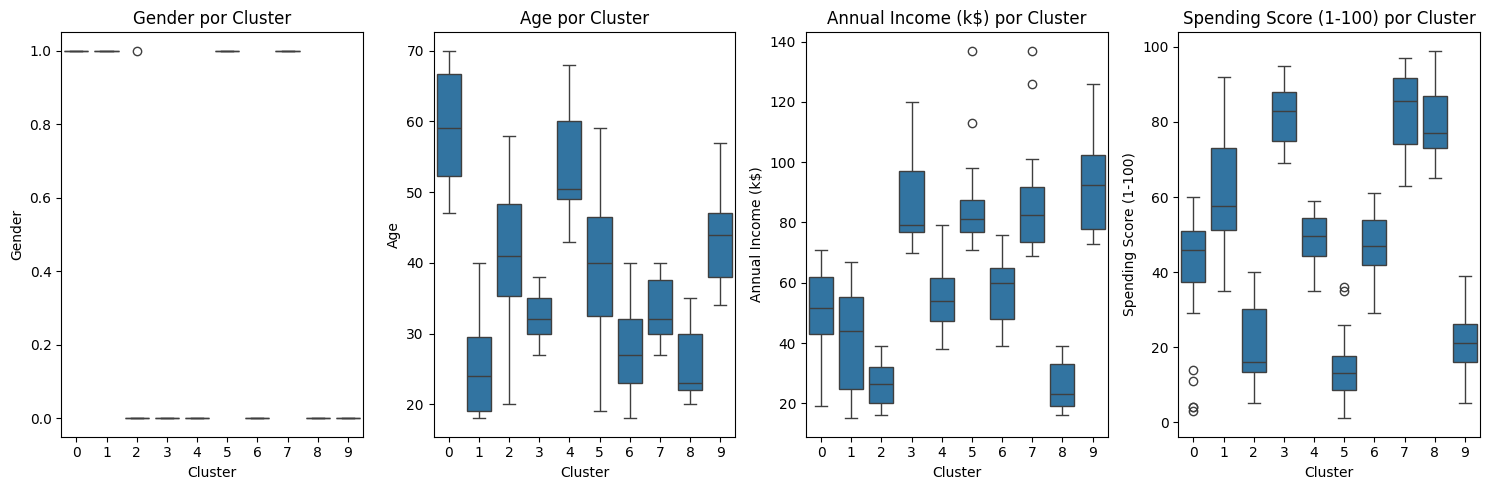

In [19]:
# 5. Análise dos clusters
df_analysis = df.copy()
df_analysis['Cluster'] = kmeans_labels

for cluster in range(len(set(kmeans_labels))):
    print(f"\nCluster {cluster}:")
    cluster_data = df_analysis[df_analysis['Cluster'] == cluster]
    print(cluster_data[features].describe())

    plt.figure(figsize=(15, 5))
    for i, feature in enumerate(features):
        plt.subplot(1, len(features), i + 1)
        sns.boxplot(data=df_analysis, x='Cluster', y=feature)
        plt.title(f'{feature} por Cluster')
    plt.tight_layout()
    plt.show()

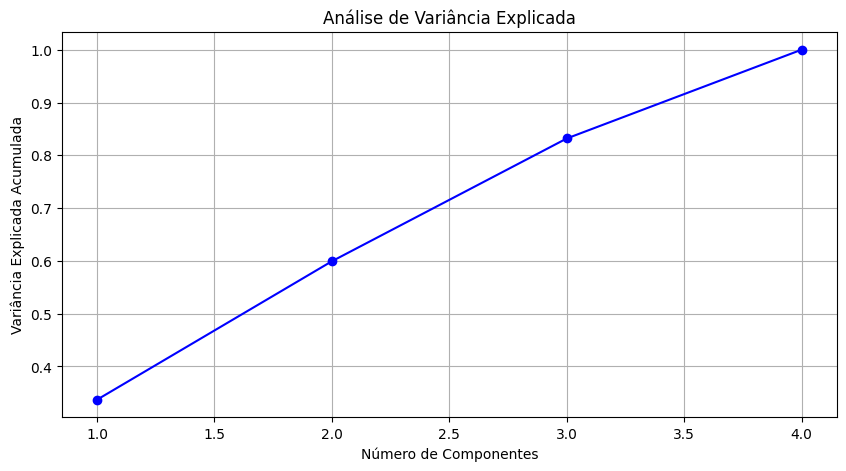

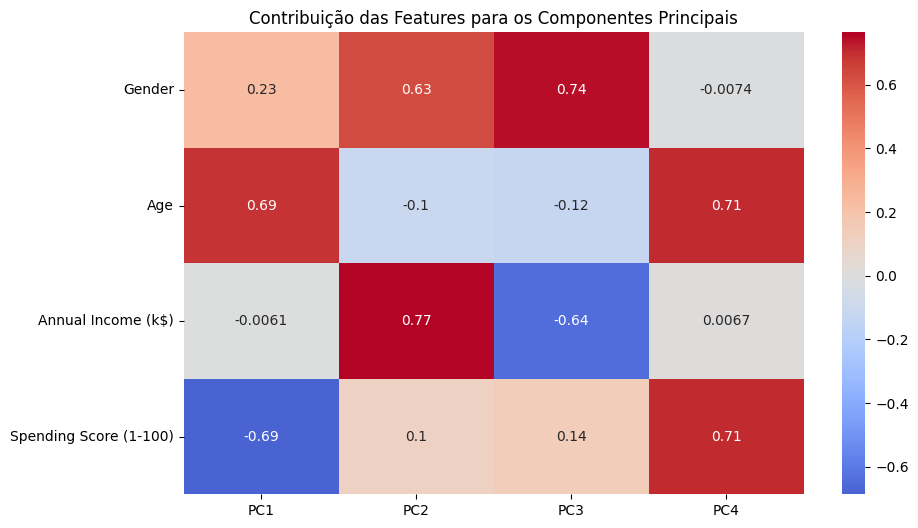

In [20]:
# 6. Análise de PCA
pca = PCA()
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Análise de Variância Explicada')
plt.grid(True)
plt.show()

loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=features
)

plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('Contribuição das Features para os Componentes Principais')
plt.show()